# **AEROFIT CASESTUDY**

**PROBLEM STATEMENT**

AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

Dataset_Link: [aerofit_dataset](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv)

In [ ]:
#Downloading aerofit dataset
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv"

--2025-02-18 10:10:48--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.135, 18.64.229.172, 18.64.229.71, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv.4’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-02-18 10:10:48 (27.7 MB/s) - ‘aerofit_treadmill.csv.4’ saved [7279/7279]



In [ ]:
# Import relevant Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data into dataframe object
df=pd.read_csv("aerofit_treadmill.csv")

In [ ]:
# Look at the sample data(5 rows)
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
135,KP481,40,Female,16,Partnered,3,3,61398,85
37,KP281,26,Male,16,Partnered,3,3,51165,85
116,KP481,31,Female,16,Partnered,2,3,51165,64
19,KP281,23,Female,15,Partnered,2,2,34110,38
123,KP481,33,Female,16,Partnered,5,3,53439,95


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

The columns in the dataset specifies the following information:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [ ]:
# No. of rows and columns
df.shape

(180, 9)

In [ ]:
# Basic Info: Column names, column data type, number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


df.info() provides a concise summary of a DataFrame, including the number of entries, column names, data types, non-null counts

From above information we can infer

*   Columns - Product,Gender,MaritalStatus are of object type values
*   Columns - Age,Education,Usage,Fitness,Income, Miles are of integer type data
*   there are no missing values in dataset [shape - (180,9)]

In [ ]:
# Converting Product,Gender,MaritalStatus columns into categorical type

df['Product']=df['Product'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['MaritalStatus']=df['MaritalStatus'].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB
None


In [ ]:
#number of unique values in  data
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
#unique values for columns Product, Gender, MaritalStatus
print(df['Product'].unique())
print(df['Gender'].unique())
print(df['MaritalStatus'].unique())

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']


There are 3 categories of Product: 'KP281', 'KP481', 'KP781'

Gender : Male, Female

MaritalStatus : Single, Partnered

In [ ]:
df.describe(include='category')#provide statistical summary of categorical columns

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


*   KP281 is the most popular product among the three offered by Aerofit(80 out of 180).
*   More males than females are present in the dataset.
*   A majority of customers in the dataset are partnered.







In [ ]:
#The value_counts method provides the frequency of unique values in a column.
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


KP281 is the best-selling treadmill, followed by KP481, then KP781.

In [ ]:
df.describe()#provide statistical summary of numerical columns by default

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Inferences from above data:

Age:

*  Average age of customers is around 28.8 years old.
*   Customers range from 18 to 50 years old.
*   The majority of customers are in their 20s and 30s

Education:

*   Customers have an average of 15.6 years of education.
*   The education level ranges from 12 to 21 years.
*   Most customers have 14 to 16 years of education.

Usage:

*   Customers plan to use the treadmill about 3.5 times per week on average.
*   Usage varies from 2 to 7 times per week.
*   Most customers plan to use the treadmill 3 to 4 times per week.

Fitness:

*   Customers rate their fitness level around 3.3 on average.
*   Fitness levels range from 1 (poor shape) to 5 (excellent shape).
*   Most customers rate their fitness around 3.

Income:

*   The average annual income of customers is around $53,719

*   Incomes vary from $29,562 to $104,581.
*   The income distribution is skewed to the right, with higher incomes having more variability.

Miles:

*   Customers expect to run/walk an average of 103.2 miles per week.
*   Expected mileage ranges from 21 to 360 miles per week.
*   The mileage distribution is also skewed to the right, indicating some customers plan to run/walk significantly more miles than others.


**Detecting Outliers**

In [ ]:
#identifying outliers for every continuous variable in the dataset using IQR method
#In Age column
q1 = df['Age'].quantile(0.25)#first quartile (25th percentile)
q3 = df['Age'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df[(df['Age'] < lb) | (df['Age'] > ub)]
print("Outliers are : ",outliers['Age'].values)


upper_bound= 46.5
lower_bound= 10.5
Outliers are :  [47 50 48 47 48]


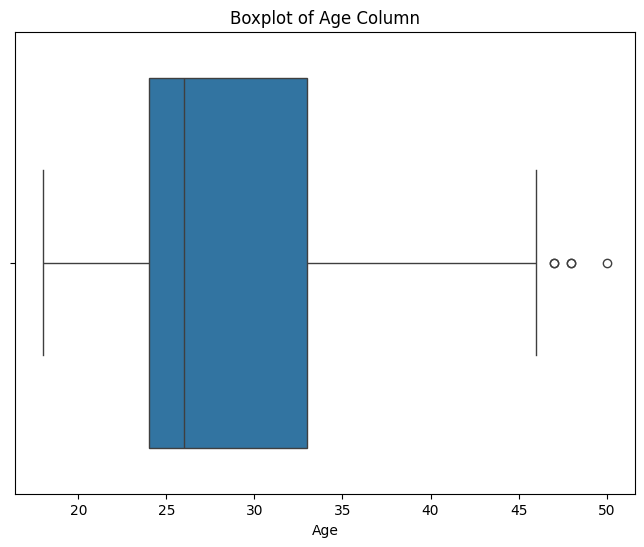

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title(f'Boxplot of Age Column')
plt.show()

In [ ]:
#In Education column
q1 = df['Education'].quantile(0.25)#first quartile (25th percentile)
q3 = df['Education'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df[(df['Education'] < lb) | (df['Education'] > ub)]
print("Outliers are : ",outliers['Education'].values)


upper_bound= 19.0
lower_bound= 11.0
Outliers are :  [20 21 21 21]


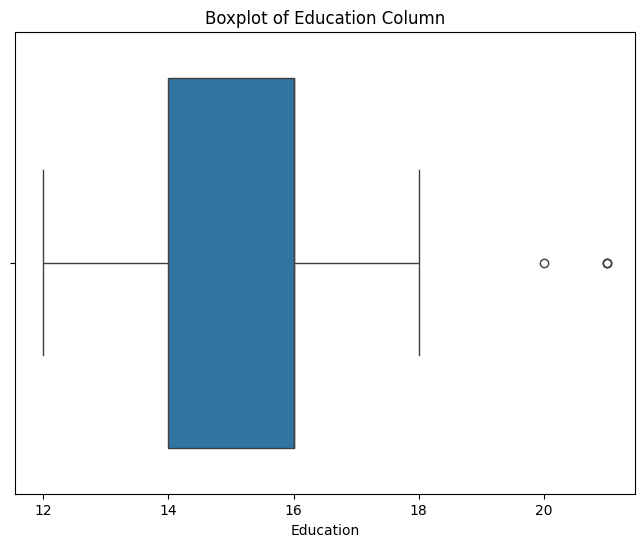

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Education'])
plt.title(f'Boxplot of Education Column')
plt.show()

In [ ]:
#In Usage column
q1 = df['Usage'].quantile(0.25)#first quartile (25th percentile)
q3 = df['Usage'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df[(df['Usage'] < lb) | (df['Usage'] > ub)]
print("Outliers are : ",outliers['Usage'].values)


upper_bound= 5.5
lower_bound= 1.5
Outliers are :  [6 6 6 7 6 7 6 6 6]


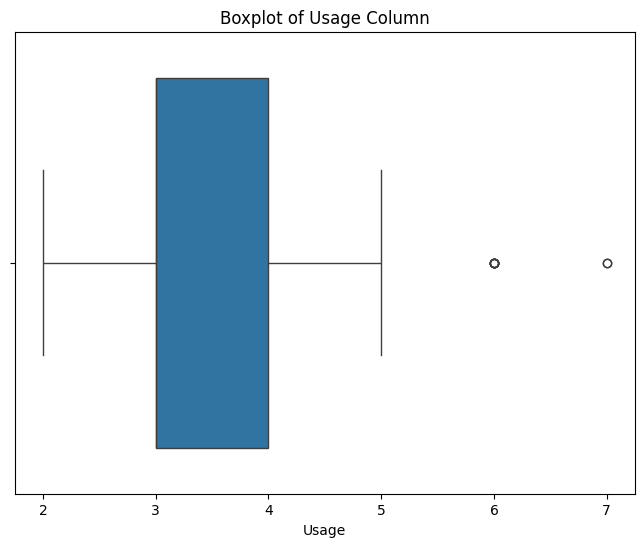

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Usage'])
plt.title(f'Boxplot of Usage Column')
plt.show()

In [ ]:
#In Fitness column
q1 = df['Fitness'].quantile(0.25)#first quartile (25th percentile)
q3 = df['Fitness'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df[(df['Fitness'] < lb) | (df['Fitness'] > ub)]
print("Outliers are : ",outliers['Fitness'].values)


upper_bound= 5.5
lower_bound= 1.5
Outliers are :  [1 1]


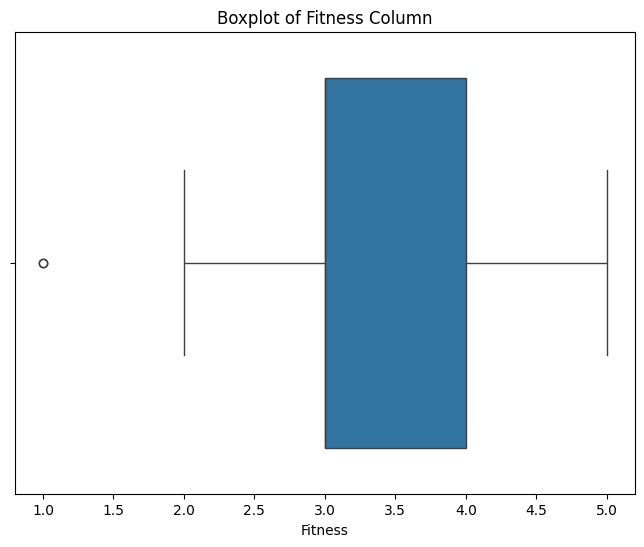

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fitness'])
plt.title(f'Boxplot of Fitness Column')
plt.show()

In [ ]:
#In Income column
q1 = df['Income'].quantile(0.25)#first quartile (25th percentile)
q3 = df['Income'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df[(df['Income'] < lb) | (df['Income'] > ub)]
print("Outliers are : ",outliers['Income'].values)


upper_bound= 80581.875
lower_bound= 22144.875
Outliers are :  [ 83416  88396  90886  92131  88396  85906  90886 103336  99601  89641
  95866  92131  92131 104581  83416  89641  90886 104581  95508]


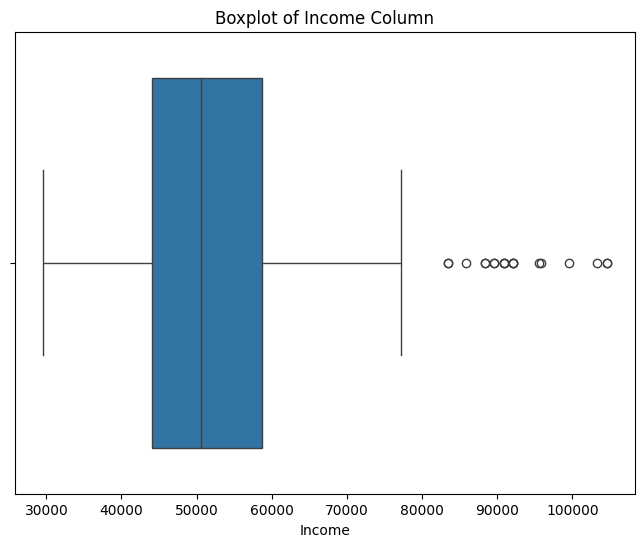

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title(f'Boxplot of Income Column')
plt.show()

In [ ]:
#In Miles column
q1 = df['Miles'].quantile(0.25)#first quartile (25th percentile)
q3 = df['Miles'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df[(df['Miles'] < lb) | (df['Miles'] > ub)]
print("Outliers are : ",outliers['Miles'].values)


upper_bound= 187.875
lower_bound= -7.125
Outliers are :  [188 212 200 200 200 240 300 280 260 200 360 200 200]


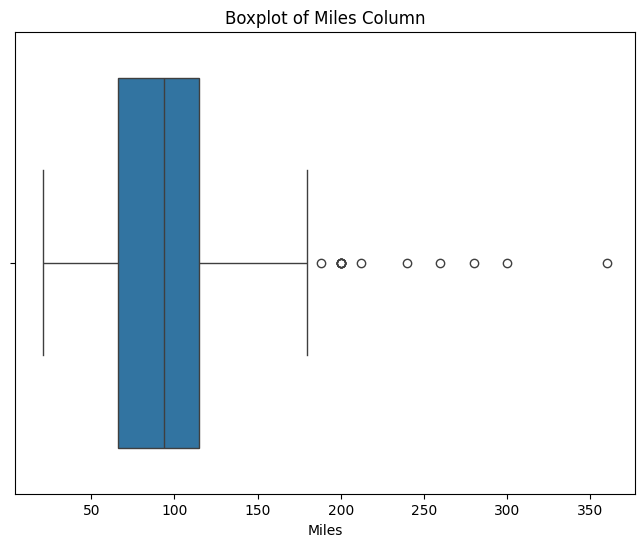

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Miles'])
plt.title(f'Boxplot of Miles Column')
plt.show()

In [ ]:
#Handling Outliers
#Remove/clip the data between the 5 percentile and 95 percentile
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

for column in continuous_vars:
    # Calculate the 5th and 95th percentiles
    lower_limit = np.percentile(df[column], 5)
    upper_limit = np.percentile(df[column], 95)

    # Clip the data
    df[column] = np.clip(df[column], lower_limit, upper_limit)
#If any value is less than lower_limit, it will be replaced with lower_limit(5th percentile value)
#If any value is greater than upper_limit, it will be replaced with upper_limit(95th percentile value)

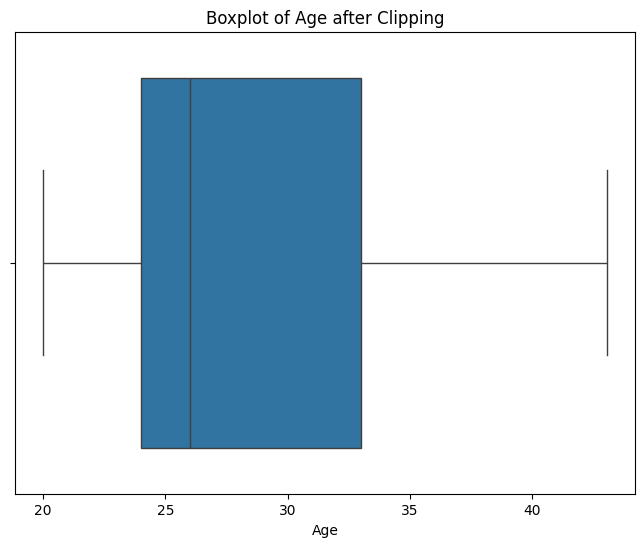

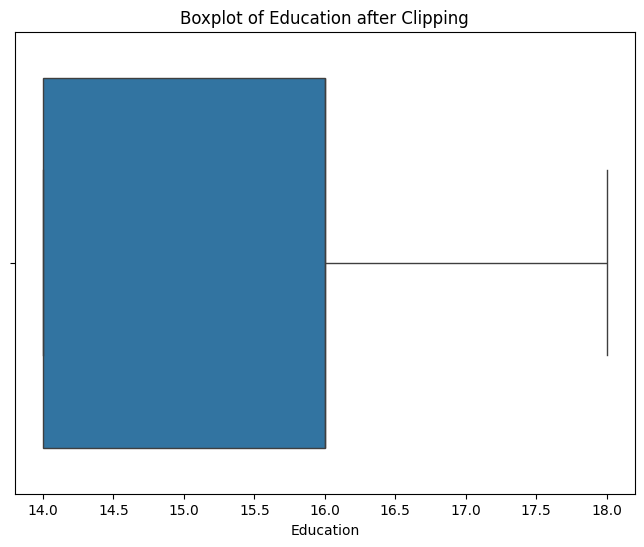

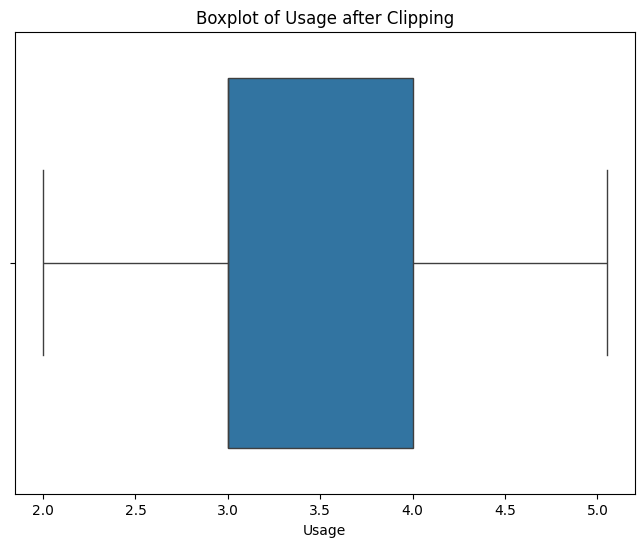

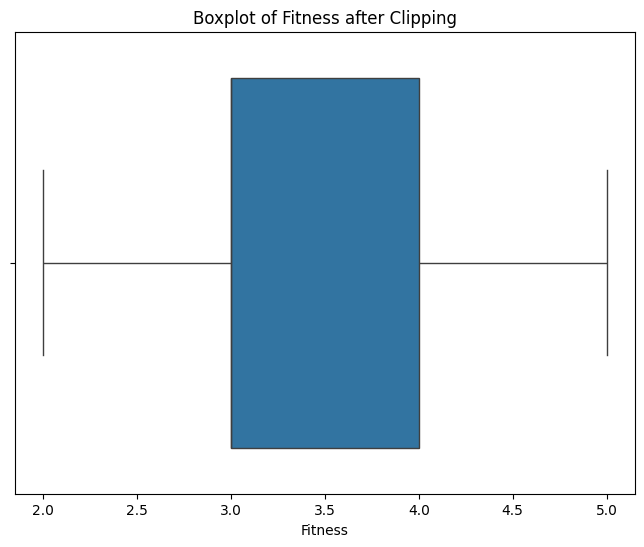

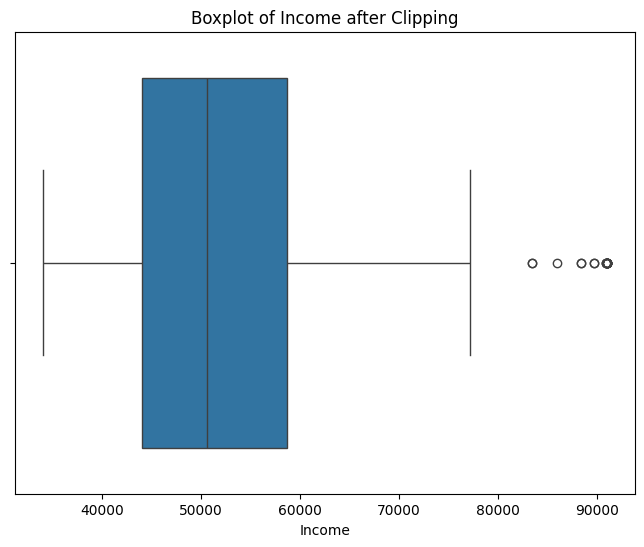

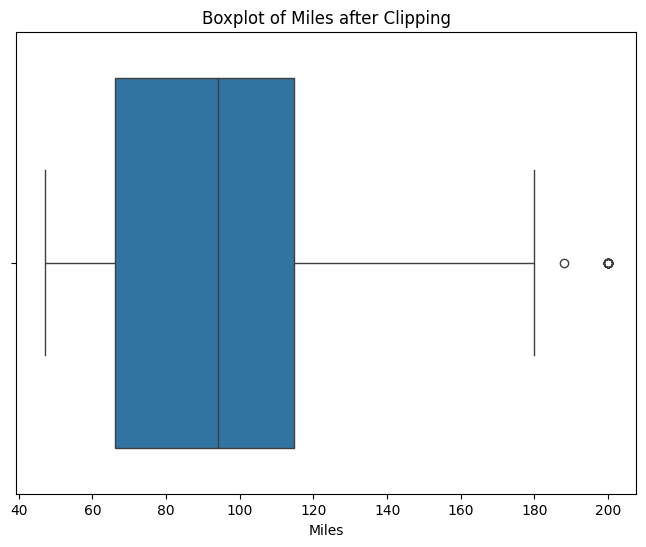

In [ ]:
#Plotting boxplots for after Clipping(Removing) of Outliers between the 5 percentile and 95 percentile
import seaborn as sns
import matplotlib.pyplot as plt

continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

for column in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} after Clipping')
    plt.show()

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.641389,15.572222,3.396944,3.322222,53477.070000,101.088889
std,6.446373,1.362017,0.952682,0.937461,15463.662523,43.364286
min,20.000000,14.000000,2.000000,2.000000,34053.150000,47.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,43.050000,18.000000,5.050000,5.000000,90948.250000,200.000000


After Clipping, Outliers in Columns Age, Education, Usage, Fitness were removed.

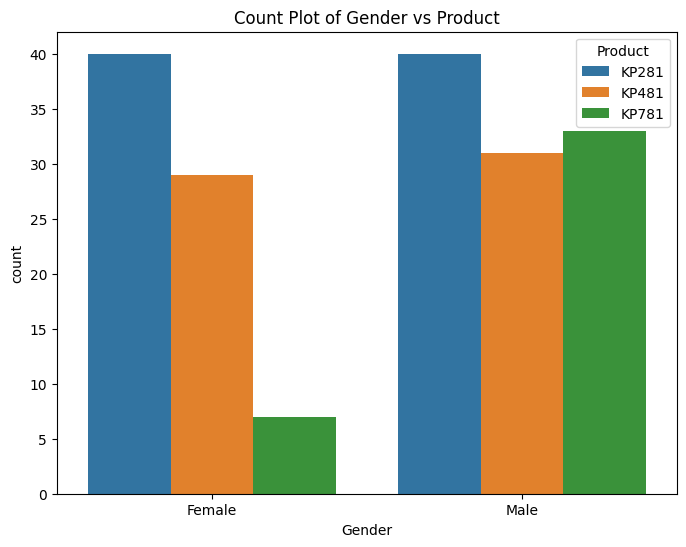

In [ ]:
#Check if features like marital status, Gender, and age have any effect on the product purchased
#Here the output variable is Product column
#Plotting count plot to find the relationship between categorical variables and output variables

#Plotting Gender versus products purchased

plt.figure(figsize=(8, 6))
sns.countplot(x=df['Gender'], hue=df['Product'])
plt.title(f'Count Plot of Gender vs Product')
plt.show()

Inferences:

*   KP281(entry level treadmill)is equally popular among both males and females, with a slightly higher purchase count for males.
*   KP481(mid level treadmill) is also purchased by both genders, but it appears to be more favored by males compared to females.
*   KP781(advanced treadmill) shows a clear preference among males. A significantly higher number of males purchased the KP781 compared to females.





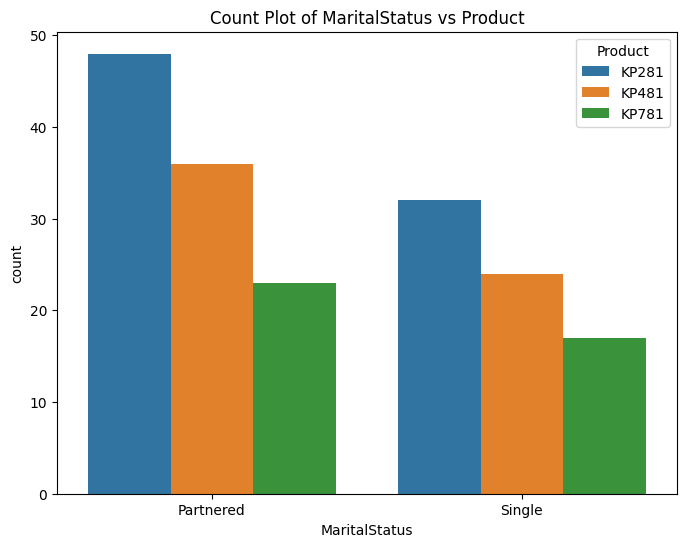

In [ ]:
#Plotting MaritalStatus versus products purchased

plt.figure(figsize=(8, 6))
sns.countplot(x=df['MaritalStatus'], hue=df['Product'])
plt.title(f'Count Plot of MaritalStatus vs Product')
plt.show()

Inferences:

Partnered individuals might be more inclined towards the KP481 and KP781 models, while the KP281 remains a popular choice for both single and partnered customers.

In [ ]:
#Converting Age column into category type
# Define age bins and labels
age_bins = [18, 25, 35, 45, 50]
age_labels = ['18-24', '25-34', '35-44', '45-50']
# Create a new categorical column 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

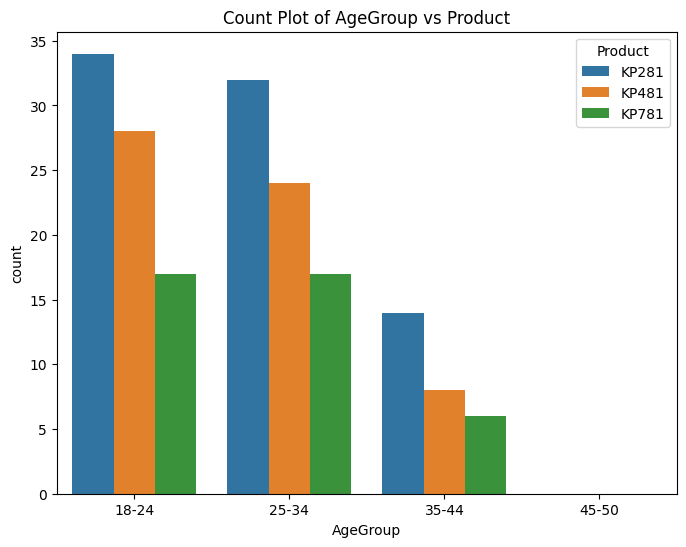

In [ ]:
#finding relationship between age range and Products purchased
plt.figure(figsize=(8, 6))
sns.countplot(x=df['AgeGroup'], hue=df['Product'])
plt.title(f'Count Plot of AgeGroup vs Product')
plt.show()

Inferences:


*   Younger customers (18-34) are more likely to purchase treadmills across all product categories, with a higher inclination towards the mid-level and advanced models.
*   As age increases, there's a shift towards the entry-level treadmill (KP281)
*   The advanced features of the KP781 seem to resonate with older customers(45-50)


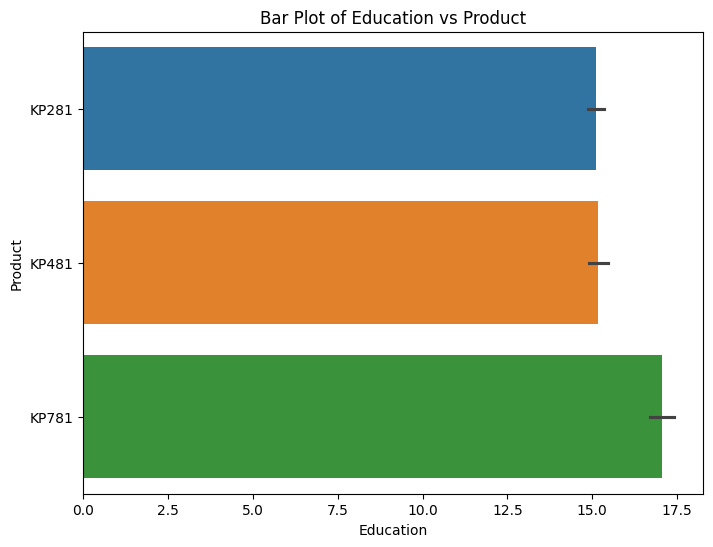

In [ ]:
#find the relationship between continuous variables and output variable.

#Education vs Product
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Product', data=df, hue='Product')
plt.title('Bar Plot of Education vs Product')
plt.show()

Inferences:

Customers with lower education levels tend to purchase KP281(entry-level) and KP481(mid-level) treadmills.

Customers with higher education levels tend to purchase the KP781 (advanced) treadmill more frequently.

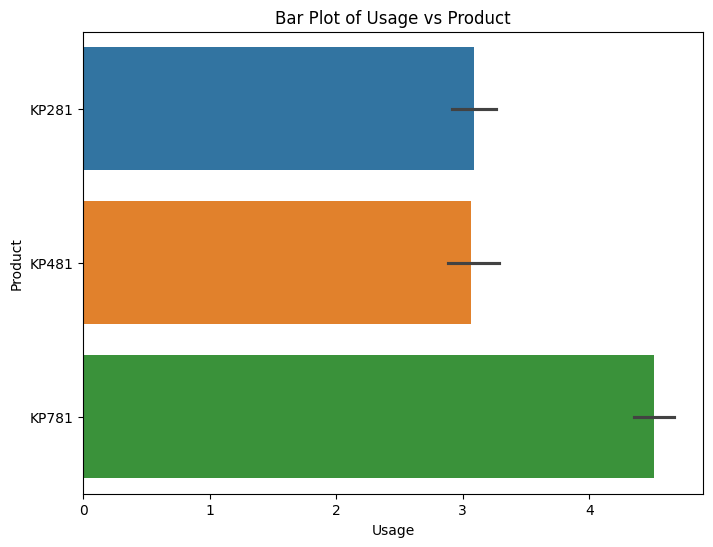

In [ ]:
#Usage vs. Product
plt.figure(figsize=(8, 6))
sns.barplot(x='Usage', y='Product', data=df, hue='Product')
plt.title('Bar Plot of Usage vs Product')
plt.show()

Inferences:

Customers who plan to use the treadmill more frequently (4+ times per week) are more likely to purchase the KP781 (advanced) treadmill.

Customers with lower planned usage (2-3 times per week) tend to favor the KP281 (entry-level) and KP481(mid-level) treadmill.


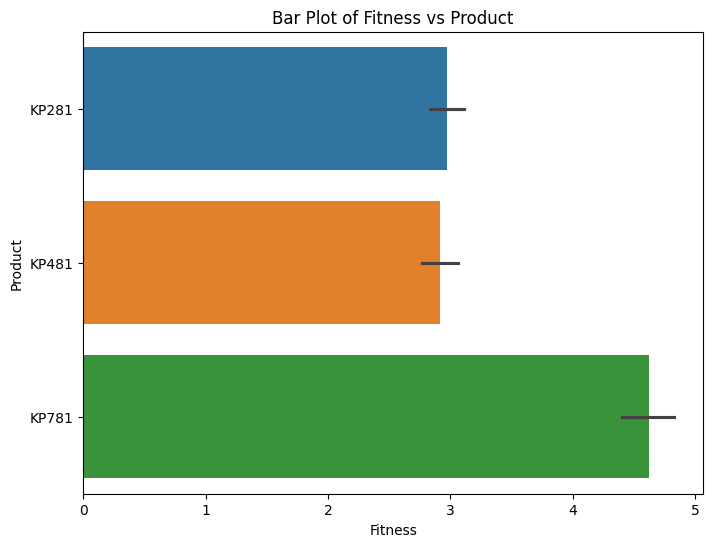

In [ ]:
#Fitness vs. Product
plt.figure(figsize=(8, 6))
sns.barplot(x='Fitness', y='Product', data=df, hue='Product')
plt.title('Bar Plot of Fitness vs Product')
plt.show()

Fitness levels 0-3: Customers primarily purchased entry-level (KP281) and mid-level (KP481) treadmills.

Fitness levels 3-5: Customers primarily purchased the high-end (KP781) treadmill.

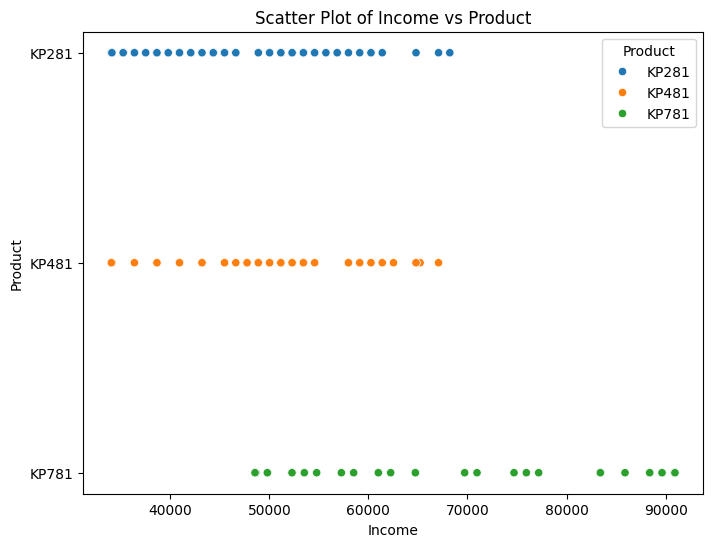

In [ ]:
#Income vs Product
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Product', data=df, hue='Product')
plt.title('Scatter Plot of Income vs Product')
plt.show()

Customers with higher incomes tend to purchase the KP781 (advanced) treadmill more frequently.
The KP281 and KP481 are more concentrated among lower to middle-income customers.

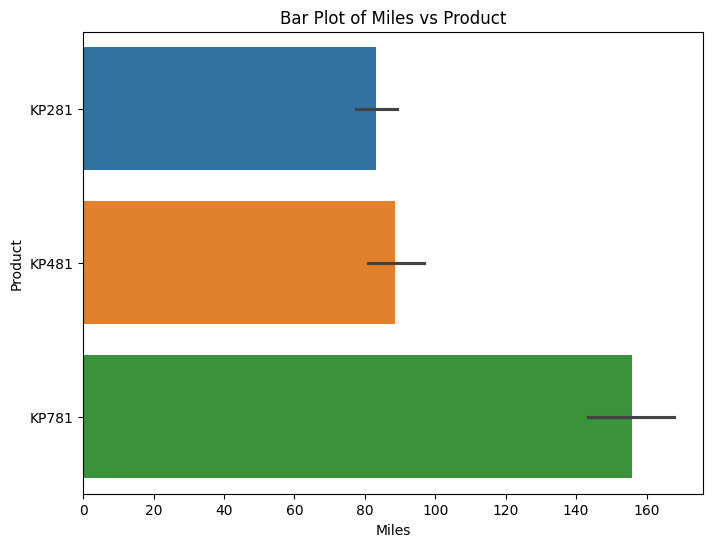

In [ ]:
#Miles vs Product
plt.figure(figsize=(8, 6))
sns.barplot(x='Miles', y='Product', data=df, hue='Product')
plt.title('Bar Plot of Miles vs Product')
plt.show()

Customers with higher mileage expectations tend to purchase higher-end treadmills (KP781), while those with lower mileage often opt for the entry-level KP281 and mid-level KP481.

# **Representing probability**

**Marginal Probability**

Marginal probability represents the probability of a single event occurring, irrespective of other variables.

In [ ]:
#marginal probability of customers purchasing each treadmill type (KP281, KP481, or KP781)
product_probs = pd.crosstab(index=df['Product'], columns="count", normalize=True)
print(product_probs)


col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


From above values, we can tell approximately 44% of customers purchased the KP281 treadmill.

approximately 33% of customers purchased the KP481 treadmill.

approximately 22% of customers purchased the KP781 treadmill.

**Conditional Probability**

Conditional probability represents the probability of an event occurring given that another event has already occurred.

Finding the probability of a customer purchasing each treadmill type given a specific value in another column (e.g., Gender, MaritalStatus, AgeGroup, etc.).

In [ ]:
pd.crosstab(index=df['Product'], columns=df['Gender'],margins=True,margins_name='Total')

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


From the above data, we can tell that 40 females purchased KP281 out of 76 total females.

Similarly there are 33 males out of total 104 males who purchased KP781 treadmill.

Instead of getting count using crosstab we can directly calculate probabilty of purchasing each treadmill, given that the customer is male or female.

We can do this by passing normalize='columns' parameter to above crosstab function, which will divide each column with its coulumn's total value.

If we pass normalise='index' as parameter it will divide each cell with its corresponding row total value

In [ ]:
Product_prob_given_Gender = pd.crosstab(index=df['Product'], columns=df['Gender'], normalize='columns')
print(f"Probability of Product Purchase by Gender(Male/Female):\n\n{Product_prob_given_Gender}")

Probability of Product Purchase by Gender(Male/Female):

Gender     Female      Male
Product                    
KP281    0.526316  0.384615
KP481    0.381579  0.298077
KP781    0.092105  0.317308


By above data, we can infer that

probability of purchasing KP781 given that the customer is Male is 0.32, it means that 32% of male customers purchased the KP781 treadmill.

Similarly, probability of purchasing KP481 given that the customer is Female is 0.38, it means that 38% of Female customers purchased the KP481 treadmill.

In [ ]:
#Calculating probability of each treadmill, given the Marital Status of customer
Product_prob_given_MaritalStatus = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], normalize='columns')
print(f"Probability of Product Purchase by MaritalStatus(Partnered/Single):\n\n{Product_prob_given_MaritalStatus}")

Probability of Product Purchase by MaritalStatus(Partnered/Single):

MaritalStatus  Partnered    Single
Product                           
KP281           0.448598  0.438356
KP481           0.336449  0.328767
KP781           0.214953  0.232877


probability of purchasing KP781 given that the customer is Single is 0.23, it means that 23% of customers whose Marital Status is Single purchased the KP781 treadmill.

probability of purchasing KP281 given that the customer is Partnered is 0.44, it means that 44% of customers customers whose Marital Status is Partnered purchased the KP281 treadmill.

In [ ]:
#Calculating probability of each treadmill, given the agegroup of customer
Product_prob_given_AgeGroup = pd.crosstab(index=df['Product'], columns=df['AgeGroup'], normalize='columns')
print(f"Probability of Product Purchase by AgeGroup:\n\n{Product_prob_given_AgeGroup}")

Probability of Product Purchase by AgeGroup:

AgeGroup    18-24     25-34     35-44
Product                              
KP281     0.43038  0.438356  0.500000
KP481     0.35443  0.328767  0.285714
KP781     0.21519  0.232877  0.214286


Inferences:

KP281 remains a popular choice across all ages.(nearly same probability across all age groups).

Younger customers (18-34) show a preference for the KP481 (mid-level) treadmill.

The purchase probability for the KP781 shows an interesting trend. It's relatively lower for customers aged 18-34 and 35-44 but increases significantly for the 45-50 age group (33.33%).


**Finding the correlation between the given features in the table.**

**Correlation:**

Correlation measures the strength and direction of the linear relationship between two variables.

It ranges from -1 to +1, where:

-1 indicates a perfect negative correlation (as one variable increases, the other decreases).

+1 indicates a perfect positive correlation (as one variable increases, the other also increases).

0 indicates no linear correlation.

In [ ]:
#Using Correlation matrix
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.301971  0.015394  0.057361  0.514362  0.029636
Education  0.301971   1.000000  0.413600  0.441082  0.628597  0.377294
Usage      0.015394   0.413600  1.000000  0.661978  0.481608  0.771030
Fitness    0.057361   0.441082  0.661978  1.000000  0.546998  0.826307
Income     0.514362   0.628597  0.481608  0.546998  1.000000  0.537297
Miles      0.029636   0.377294  0.771030  0.826307  0.537297  1.000000


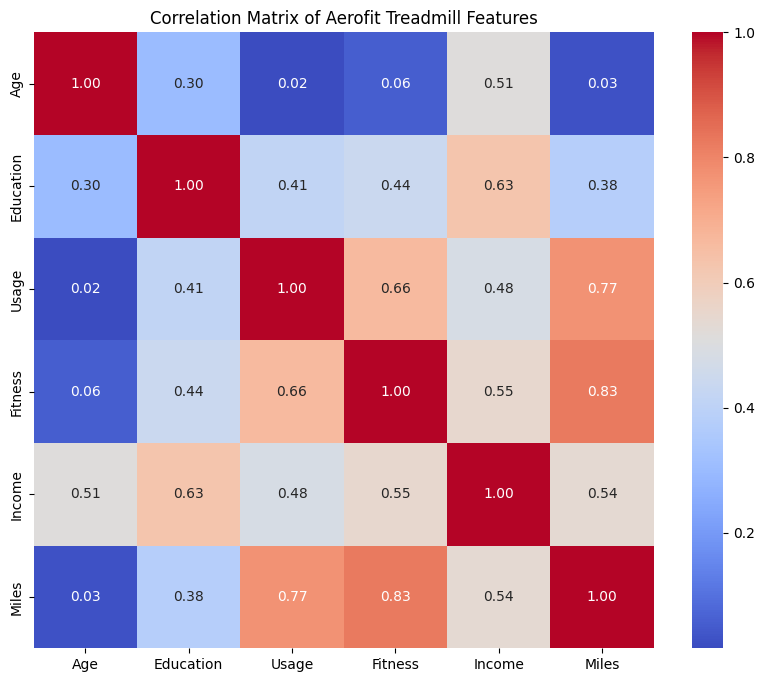

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Aerofit Treadmill Features')
plt.show()

Inferences from above heatmap:(Correlation Matrix of Aerofit Treadmill Numerical Features)

* **Strong Positive Correlations:**

Fitness and Miles: (0.822393) - Customers with higher fitness levels tend to expect to run/walk more miles. This is the strongest positive correlation in the matrix.

Usage and Miles: (0.786269) - Customers who plan to use the treadmill more frequently also expect to run/walk more miles.

Usage and Fitness: (0.668606) - Customers who plan to use the treadmill more frequently also tend to have higher fitness levels.

Education and Income: (0.628908) - Customers with higher education levels tend to have higher incomes.

   
*  **Moderate Positive Correlations:**

Income and Miles: (0.537297) - Customers with higher incomes tend to expect to run/walk more miles.

Income and Fitness: (0.535945) - Customers with higher incomes tend to have higher fitness levels.

Income and Usage: (0.527707) - Customers with higher incomes tend to plan to use the treadmill more frequently.

Education and Fitness: (0.410581) - Customers with higher education levels tend to have higher fitness levels.

*   **Weak or No Correlations:**

Age and Usage: (0.015064) - Age has a negligible impact on planned treadmill usage.

Age and Fitness: (0.061105) - Age has a minimal impact on fitness level.

Age and Miles: (0.026168) - Age has a negligible impact on expected mileage.




Finding Correlation between Each treadmill type against available numeric features

As corr() function works with only numeric type columns, we are encoding Product column(category type) using pd.get_dummies() function.

This creates three new columns: 'KP281', 'KP481', and 'KP781', with binary values (0 or 1) indicating whether a customer purchased that specific product.

In [ ]:
#Encoded 'Product' column
df_encoded = pd.get_dummies(df, columns=['Product'], prefix='', prefix_sep='')

In [ ]:
#Calculation of correlation matrix
correlation_matrix_product = df_encoded[['KP281', 'KP481', 'KP781', 'Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr()

In [ ]:
#correlation of each product with the numerical columns
for product in ['KP281', 'KP481', 'KP781']:
    print(f"Correlation of {product} with other features:\n{correlation_matrix_product[product][['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]}\n")

Correlation of KP281 with other features:
Age         -0.029760
Education   -0.294507
Usage       -0.291333
Fitness     -0.332207
Income      -0.399793
Miles       -0.371555
Name: KP281, dtype: float64

Correlation of KP481 with other features:
Age          0.017630
Education   -0.202459
Usage       -0.245825
Fitness     -0.306755
Income      -0.203157
Miles       -0.205850
Name: KP481, dtype: float64

Correlation of KP781 with other features:
Age          0.015579
Education    0.581570
Usage        0.626949
Fitness      0.744891
Income       0.708203
Miles        0.677504
Name: KP781, dtype: float64



Key Insights:

KP281: Primarily purchased by customers with lower education, income, fitness levels, and usage expectations.

KP481: Shows a mixed pattern with weak correlations, but generally purchased by customers with lower fitness levels and usage expectations.

KP781: Strongly associated with higher education, income, fitness levels, usage expectations, and expected mileage. Customers who are more serious about fitness and have higher disposable incomes tend to purchase this model.

# **Customer profiling**

Based on all above inferences,

**Customer Profile for KP281(Entry-Level Treadmill)**

**Age:** While age has a weak negative correlation with KP281 purchases, it's not a strong differentiating factor. This treadmill is purchased across a range of age groups but might be slightly more popular among younger customers.

**Gender:** Both males and females purchase KP281, with a slightly higher proportion of males in the dataset. However, gender is not a strong predictor of KP281 purchases.

**Income:** KP281 has a moderate negative correlation with income, suggesting that customers with lower incomes are more likely to purchase this model. This aligns with its positioning as an entry-level, budget-friendly option.

**Education:** Customers with lower education levels are more likely to purchase KP281.

**Usage and Fitness:** Customers who plan to use the treadmill less frequently and have lower fitness levels are more likely to purchase KP281.

**Miles:** Customers who expect to run/walk fewer miles tend to purchase KP281.

**Marital Status:** Both single and partnered customers purchase KP281, with a slightly higher proportion of partnered individuals.


**Customer Profile for KP481(Mid-Level Treadmill)**

**Age**: Age has a very weak positive correlation with KP481 purchases, suggesting it's not a major differentiating factor. This treadmill is purchased across a range of age groups.

**Gender**: Both males and females purchase KP481, with a slightly higher proportion of males. However, gender is not a strong predictor of KP481 purchases.

**Income**: KP481 has a weak negative correlation with income, indicating that it's purchased by customers with a wider range of incomes compared to KP281.

**Education**: Customers with varying education levels purchase KP481, though there's a slight negative correlation, suggesting a slightly lower preference among higher-educated customers.

**Usage and Fitness**: KP481 is purchased by customers with varying usage and fitness levels, though there's a slight negative correlation, indicating a slightly lower preference among those with higher usage and fitness levels.

**Miles**: KP481 is purchased by customers with varying mileage expectations, though there's a slight negative correlation, suggesting a slightly lower preference among those who expect to run/walk more miles.

**Marital Status**: Both single and partnered customers purchase KP481, with a slightly higher proportion of partnered individuals.

**Customer Profile for KP781 (Advanced Treadmill):**

**Age**: Age has a very weak positive correlation with KP781 purchases, indicating it's not a major differentiating factor. This treadmill is purchased across a range of age groups, with a slightly higher preference among older customers.

**Gender**: KP781 has a higher purchase probability among males compared to females.

**Income**: KP781 has a strong positive correlation with income, suggesting that customers with higher incomes are more likely to purchase this model. This aligns with its positioning as a premium, high-performance treadmill.

**Education**: Customers with higher education levels are more likely to purchase KP781.

**Usage and Fitness**: Customers who plan to use the treadmill more frequently and have higher fitness levels are more likely to purchase KP781.

**Miles**: Customers who expect to run/walk more miles are more likely to purchase KP781.

**Marital Status**: Both single and partnered customers purchase KP781, with a slightly higher proportion of single individuals.

# **Recommendations based on Analysis performed**

**1. Know Your Customers:**

KP281: This treadmill is perfect for beginners and those on a budget. Promote its affordability and simplicity.

KP481: This treadmill is a good all-around choice for people with different fitness levels. Highlight its versatility and value.

KP781: This treadmill is for serious fitness enthusiasts who want the best. Emphasize its advanced features and durability.


**2. Improve the Treadmills:**

KP281: Add simple fitness tracking to help beginners monitor their progress.

KP481: Include more features like incline options and personalized workouts to make it even better.

KP781: Continue to add cutting-edge technology to stay ahead of the competition.


**3. Pricing:**

KP281: Keep it affordable and offer discounts to attract new customers.

KP481: Price it competitively and offer payment plans to make it accessible.

KP781: Maintain a premium price that reflects its high quality.


**4. Support Your Customers:**

Provide excellent customer service for everyone.

Build an online community for customers to connect and share their fitness journeys.

Offer personalized training programs to help customers achieve their goals.